In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 45
min later the temperature is 80$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [2]:
T_initial = 85  # Temperature of the corpse at 11:00 am in Fahrenheit
T_45min = 80  # Temperature of the corpse 45 minutes later in Fahrenheit
T_ambient = 65  # Ambient temperature in Fahrenheit
delta_t = 45 / 60  # Time difference in hours (45 minutes)

# Finite difference approximation to calculate dT/dt
dT_dt_approx = (T_45min - T_initial) / delta_t

# Now we can solve for K using the formula dT/dt = -K(T - Ta)
K = -dT_dt_approx / (T_initial - T_ambient)
print("K =", K)

K = 0.33333333333333337


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [3]:
def calculate_k(T_initial, T_final, T_ambient, time_elapsed_hours):
    # Finite difference approximation to calculate dT/dt
    dT_dt_approx = (T_final - T_initial) / time_elapsed_hours

    # Solve for K using the formula dT/dt = -K(T - Ta)
    K = -dT_dt_approx / (T_initial - T_ambient)
    
    # Return K
    return K

# Using the values from part 1:
T_initial_example = 85 
T_final_example = 80 
T_ambient_example = 65  
time_elapsed_example = 45 / 60  

K = calculate_k(T_initial_example, T_final_example, T_ambient_example, time_elapsed_example)
print("K =", K)

K = 0.33333333333333337


3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

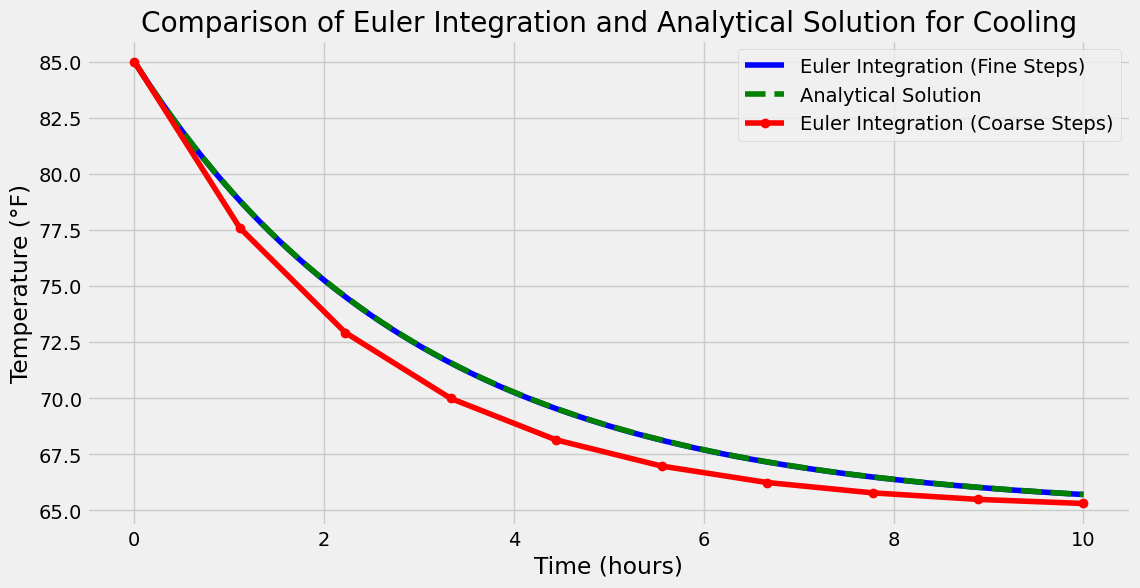

In [4]:
# Given values
T_initial = 85  # Initial temperature of the corpse (T(0))
T_ambient = 65  # Ambient temperature (T_a)
K = 0.3333       # Approximation of empirical constant (K)

# Analytical solution function
def analytical_solution(T0, Ta, K, t):
    return Ta + (T0 - Ta) * np.exp(-K * t)

# Euler integration function for the cooling process
def euler_integration(T0, Ta, K, time_steps):
    T = T0  # Initial temperature
    temperatures = [T]  # List to store temperatures
    for i in range(1, len(time_steps)):
        dt = time_steps[i] - time_steps[i-1]
        dT = -K * (T - Ta) * dt
        T += dT
        temperatures.append(T)
    return np.array(temperatures)

# Time steps for analysis
time_steps_fine = np.linspace(0, 10, 1000)  # Fine time steps
time_steps_coarse = np.linspace(0, 10, 10)  # Coarse time steps

# Euler integration results for fine and coarse time steps
euler_temperatures_fine = euler_integration(T_initial, T_ambient, K, time_steps_fine)
euler_temperatures_coarse = euler_integration(T_initial, T_ambient, K, time_steps_coarse)

# Analytical solution results for comparison
analytical_temperatures_fine = analytical_solution(T_initial, T_ambient, K, time_steps_fine)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time_steps_fine, euler_temperatures_fine, label='Euler Integration (Fine Steps)', linestyle='-', color='blue')
plt.plot(time_steps_fine, analytical_temperatures_fine, label='Analytical Solution', linestyle='--', color='green')
plt.plot(time_steps_coarse, euler_temperatures_coarse, label='Euler Integration (Coarse Steps)', linestyle='-', marker='o', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.title('Comparison of Euler Integration and Analytical Solution for Cooling')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Part b: Determining the final temperature as t approaches infinity
# The final temperature should theoretically be the ambient temperature T_a
final_temperature = T_ambient

# Part c: Calculate the time of death given the corpse's temperature was 98.6°F
# We rearrange the analytical solution to solve for t:
# 98.6 = T_a + (T(0) - T_a)e^{-Kt}
# We can isolate e^{-Kt} and then take the natural logarithm to solve for t

T_body_normal = 98.6  # Normal body temperature in Fahrenheit

# Solving for t
time_of_death = -np.log((T_body_normal - T_ambient) / (T_initial - T_ambient)) / K

print("Final Temp: ", final_temperature, "Degrees")
print("Time of Death: ", time_of_death)

'''The time of death being a negative number symbolizes the body died approximatle 1.5 hours before being found... 
Thus, the time of death was around 9:30 am.'''

Final Temp:  65 Degrees
Time of Death:  -1.556537033948897


'The time of death being a negative number symbolizes the body died approximatle 1.5 hours before being found... \nThus, the time of death was around 9:30 am.'